In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

data_path = '/Users/raineyaberle/Courses/GEOS_505_ResearchComputing/data/geopandas_soil_example/'
dcew_shp = 'DCEW_BND_GEO.shp'
boi1_soil_shp = 'soilmu_a_id001.shp'
boi2_soil_shp = 'soilmu_a_id683.shp'

In [7]:
dcew_bound = gpd.read_file(data_path + 'DCEW_BND/' + dcew_shp)
boi1_soil = gpd.read_file(data_path + 'soilmu_a_id001/' + boi1_soil_shp)
boi2_soil = gpd.read_file(data_path + 'soilmu_a_id683/' +boi2_soil_shp)

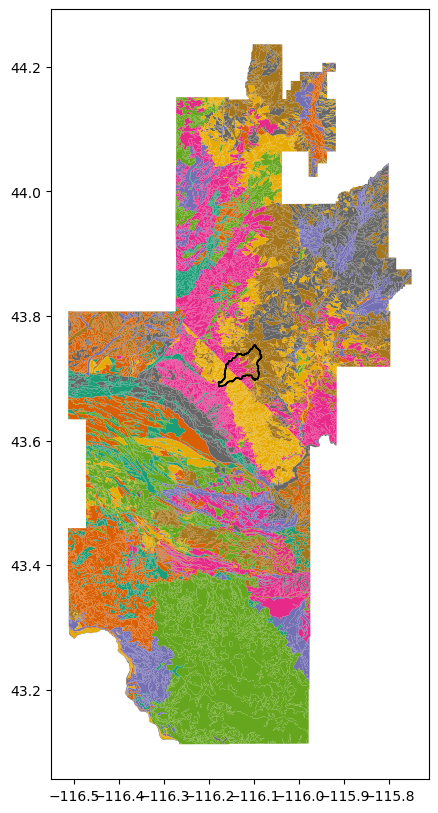

In [26]:
fig, ax1 = plt.subplots(figsize=(10,10))
boi1_soil.plot(column='MUSYM', cmap='Dark2', ax=ax1)
boi2_soil.plot(column='MUSYM', cmap='Dark2', ax=ax1)
dcew_bound.plot(ax=ax1, facecolor='none', edgecolor='black', label='DCEW')
plt.show()